# Homework 4 - Applied ML

In [66]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
sns.axes_style("darkgrid")
sns.set_palette("Set2")

## Question 1 : Propensity score matching

### 1. A naive analysis

In [20]:
df = pd.read_csv('../lalonde.csv')
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [21]:
df_treated = df.loc[df['treat'] == 1]
df_untreated = df.loc[df['treat'] == 0]

print(df_untreated['re78'].mean())
print(df_treated['re78'].mean())

6349.143530270269
6984.169742307697


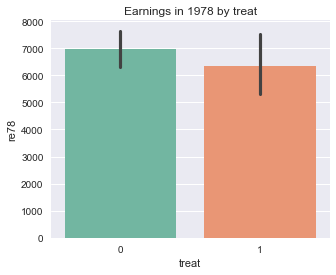

In [28]:
fig, ax = plt.subplots(figsize=(5,4))
plt.title("Earnings in 1978 by treat")
ax = sns.barplot(x="treat", y="re78", data=df)
plt.show()

But this is not really nice, because to plot this we use mean and standard deviation, and theses are not robust statistics. A better idea is to use plot box, which represents quartiles and median, which are robust statistics. 

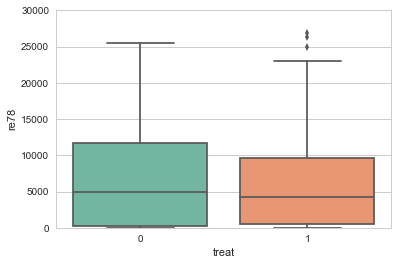

In [78]:
sns.set_style("whitegrid")
plt.ylim(0, 30000)
ax = sns.boxplot(x="treat", y="re78", data=df)

TODO : Add comments for boxplot

### 2. A closer look at the data

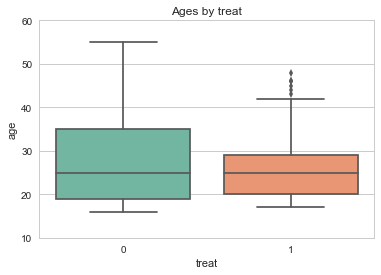

In [82]:
sns.set_style("whitegrid")
plt.ylim(10, 60)
ax = sns.boxplot(x="treat", y="age", data=df).set_title('Ages by treat')

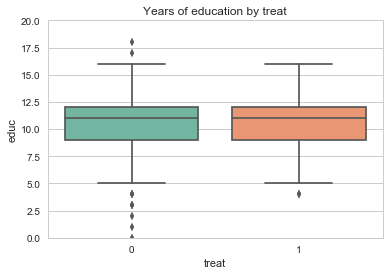

In [84]:
sns.set_style("whitegrid")
plt.ylim(0, 20)
ax = sns.boxplot(x="treat", y="educ", data=df).set_title('Years of education by treat')

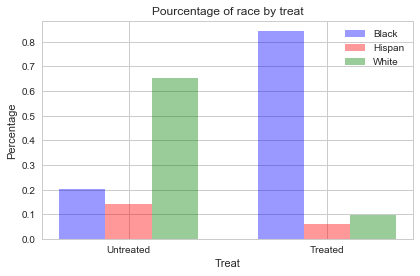

In [133]:
nb_untreated = len(df_untreated.index)
nb_treated = len(df_treated.index)

untreated_black = len(df_untreated.loc[df_untreated['black'] == 1].index) 
untreated_hispan = len(df_untreated.loc[df_untreated['hispan'] == 1].index) 
untreated_white = nb_untreated - untreated_black - untreated_hispan

treated_black = len(df_treated.loc[df_treated['black'] == 1].index) 
treated_hispan = len(df_treated.loc[df_treated['hispan'] == 1].index) 
treated_white = nb_treated - treated_black - treated_hispan 


n_groups = 2

black = (untreated_black / nb_untreated, treated_black / nb_treated)

hispan = (untreated_hispan / nb_untreated, treated_hispan / nb_treated)

white = (untreated_white / nb_untreated, treated_white / nb_treated)

fig, ax = plt.subplots()

index = np.arange(n_groups)

bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index*1.5, black, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Black')

rects2 = plt.bar(index*1.5 + bar_width, hispan, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Hispan')

rects3 = plt.bar(index*1.5 + 2*bar_width, white, bar_width,
                 alpha=opacity,
                 color='g',
                 error_kw=error_config,
                 label='White')


plt.xlabel('Treat')
plt.ylabel('Percentage of races')
plt.title('Percentage of races by treat')
plt.xticks(index*1.5 + bar_width, ('Untreated', 'Treated'))
plt.legend()

plt.tight_layout()
plt.show()

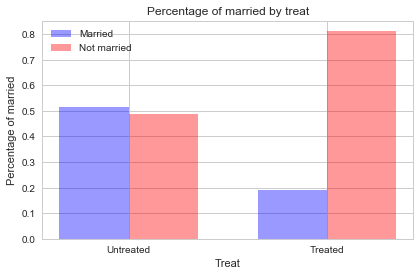

In [136]:
untreated_married = len(df_untreated.loc[df_untreated['married'] == 1])
untreated_notmarried = nb_untreated - untreated_married

treated_married = len(df_treated.loc[df_treated['married'] == 1])
treated_notmarried = nb_treated - treated_married

n_groups = 2

married = (untreated_married / nb_untreated, treated_married / nb_treated)

notmarried = (untreated_notmarried / nb_untreated, treated_notmarried / nb_treated)


fig, ax = plt.subplots()

index = np.arange(n_groups)

bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, married, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Married')

rects2 = plt.bar(index + bar_width, notmarried, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Not married')



plt.xlabel('Treat')
plt.ylabel('Percentage')
plt.title('Percentage of married by treat')
plt.xticks(index + bar_width / 2, ('Untreated', 'Treated'))
plt.legend()

plt.tight_layout()
plt.show()

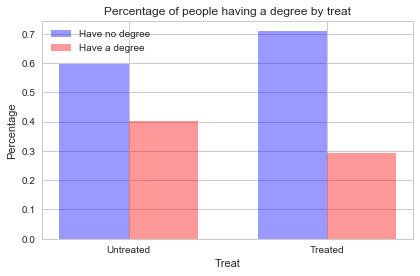

In [137]:
untreated_nodegree = len(df_untreated.loc[df_untreated['nodegree'] == 1])
untreated_degree = nb_untreated - untreated_nodegree

treated_nodegree = len(df_treated.loc[df_treated['nodegree'] == 1])
treated_degree = nb_treated - treated_nodegree

n_groups = 2

nodegree = (untreated_nodegree / nb_untreated, treated_nodegree / nb_treated)

degree = (untreated_degree / nb_untreated, treated_degree / nb_treated)


fig, ax = plt.subplots()

index = np.arange(n_groups)

bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, nodegree, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Have no degree')

rects2 = plt.bar(index + bar_width, degree, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Have a degree')



plt.xlabel('Treat')
plt.ylabel('Percentage')
plt.title('Percentage of people having a degree by treat')
plt.xticks(index + bar_width / 2, ('Untreated', 'Treated'))
plt.legend()

plt.tight_layout()
plt.show()